# Get the Rating Matrix

In [102]:
# !pip install apyori

In [103]:
# !pip install mlxtend  

In [104]:
# !pip install efficient-apriori

In [105]:
import pandas as pd 
data_with_3 = pd.read_csv("../datasets/ratings_with_3_combinations.csv")[["rating", "bill"]]

data_with_3.head()

,rating,bill
0,1,"(745321, 666652)"
1,1,"(745321, 751782)"
2,10,"(745321, 751839)"
3,1,"(666652, 751782)"
4,1,"(666652, 751839)"


In [106]:
data_3_greater_1 = data_with_3[data_with_3.rating > 1] 

data_3_greater_1.head() 

,rating,bill
2,10,"(745321, 751839)"
5,151,"(751782, 751839)"
10,107,"(751873, 760125)"
11,12,"(772494, 754574)"
13,11,"(772494, 749358)"


In [107]:
len(data_with_3), len(data)

(5216080, 771062)

In [108]:
data.describe()

,option_x,option_y,rating
count,771062.000000,771062.000000,771062.000000
mean,735325.372226,735395.857417,2.418680
std,42364.768430,42085.392109,9.794105
min,16329.000000,10494.000000,1.000000
25%,714744.000000,714645.000000,1.000000
50%,751526.000000,751358.000000,1.000000
75%,760344.000000,760209.000000,2.000000
max,823758.000000,823758.000000,2254.000000


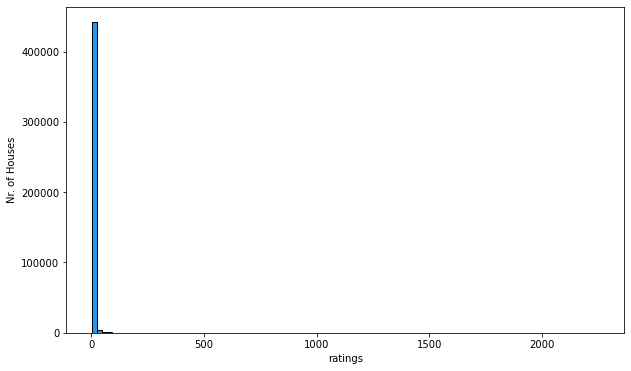

In [109]:
# If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized.
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.hist(data_3_greater_1['rating'], bins=100, ec='black', color='#2196f3')
plt.xlabel('ratings')
plt.ylabel('Nr. of Houses')
plt.show()

In [110]:
max(data_3_greater_1.rating),  min(data_3_greater_1.rating)

(2254, 2)

c:\Users\melih.kacaman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

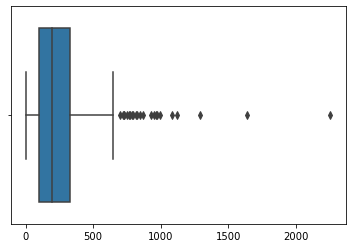

In [111]:
import seaborn as sns
sns.boxplot(data_3_greater_1['rating'].unique())

In [112]:
import numpy as np
data_3_greater_1_log = data_3_greater_1.copy() 
data_3_greater_1_log["rating"] = np.log(data_3_greater_1.rating) 

data_3_greater_1_log.head() 

,rating,bill
2,2.302585,"(745321, 751839)"
5,5.017280,"(751782, 751839)"
10,4.672829,"(751873, 760125)"
11,2.484907,"(772494, 754574)"
13,2.397895,"(772494, 749358)"


In [113]:
max(data_3_greater_1_log.rating),  min(data_3_greater_1_log.rating)

(7.720461694599722, 0.6931471805599453)

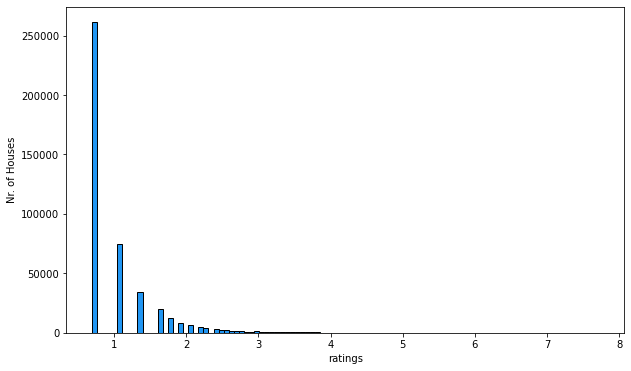

In [114]:
# If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized.
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.hist(data_3_greater_1_log['rating'], bins=100, ec='black', color='#2196f3')
plt.xlabel('ratings')
plt.ylabel('Nr. of Houses')
plt.show()

c:\Users\melih.kacaman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

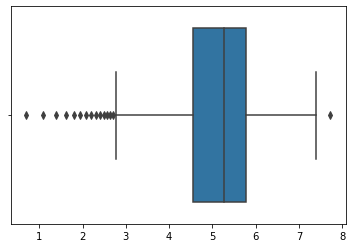

In [115]:
import seaborn as sns
sns.boxplot(data_3_greater_1_log['rating'].unique())

In [116]:
import numpy as np 
Q1 = np.percentile(data_3_greater_1_log['rating'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_3_greater_1_log['rating'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("data_3_greater_1_log has IQR:", IQR) 

data_3_greater_1_log has IQR: 0.6931471805599453


In [117]:
import pandas as pd
data_raw = pd.read_csv("../datasets/raw_data.csv") 

In [118]:
data_raw.head() 

,Unnamed: 0,optionId,bill
0,0,751839,1
1,1,751782,1
2,2,745321,1
3,3,666652,1
4,4,751873,2


In [119]:
data_raw

,Unnamed: 0,optionId,bill
0,0,751839,1
1,1,751782,1
2,2,745321,1
3,3,666652,1
4,4,751873,2
...,...,...,...
1023028,1023028,764458,326055
1023029,1023029,764905,326056
1023030,1023030,774483,326056
1023031,1023031,752244,326057


In [120]:
transactions = [] 

bill = 1
option_bill = [] 

for index,row in data_raw.iterrows(): 
    if(row.bill == bill):
        option_bill.append(row.optionId)
    else:
        bill = row.bill 
        transactions.append(tuple(set(option_bill))) 
        option_bill.clear()
        option_bill.append(row.optionId)  


transactions[:3]

[(745321, 666652, 751782, 751839),
 (751873, 760125),
 (772494, 754574, 745328, 749358, 745310)]

# Model 1: Matrix Factorization Using Keras 

#### Data Prep for MF 

In [121]:
data_3_greater_1_log.head() 

,rating,bill
2,2.302585,"(745321, 751839)"
5,5.017280,"(751782, 751839)"
10,4.672829,"(751873, 760125)"
11,2.484907,"(772494, 754574)"
13,2.397895,"(772494, 749358)"


In [122]:
data_3_greater_1_log.bill.unique().shape

(448529,)

In [123]:
data_3_greater_1_log.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448529 entries, 2 to 5215140
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rating  448529 non-null  float64
 1   bill    448529 non-null  object 
dtypes: float64(1), object(1)
memory usage: 10.3+ MB


In [124]:
from ast import literal_eval

data_3_greater_1_log.bill = data_3_greater_1_log.bill.apply(literal_eval) 
data_3_greater_1_log.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448529 entries, 2 to 5215140
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rating  448529 non-null  float64
 1   bill    448529 non-null  object 
dtypes: float64(1), object(1)
memory usage: 10.3+ MB


In [125]:
type(data_3_greater_1_log.bill.iat[0])

tuple

In [126]:
statement = (772494, 754574, 749358) 
s_set = set(statement) 
tuple(s_set.difference([772494]))

(749358, 754574)

In [127]:
def split_bill(statement):
    return [
        (tuple(set(statement).difference([statement[0]])), statement[0]),
        (tuple(set(statement).difference([statement[1]])), statement[1]),
        (tuple(set(statement).difference([statement[2]])), statement[2])
    ]

In [128]:
data_3_greater_1_log["option_count"] = data_3_greater_1_log.bill.apply(lambda x: len(x))
data_3_greater_1_log.tail() 

,rating,bill,option_count
5211482,0.693147,"(774694, 767718, 767721)",3
5213307,0.693147,"(774590, 774319)",2
5213311,0.693147,"(774469, 774590, 774319)",3
5213576,0.693147,"(764896, 786771, 774571)",3
5215140,0.693147,"(748899, 748868, 752949)",3


In [129]:
sublist_by_2 = data_3_greater_1_log[data_3_greater_1_log.option_count == 2]

In [130]:
sublist_by_2_concat = pd.concat([
    sublist_by_2,
    pd.DataFrame(data_3_greater_1_log[data_3_greater_1_log.option_count == 2].bill.to_list(), columns=["LHS", "RHS"], index=sublist_by_2.index)
], axis=1)
sublist_by_2_concat.head()

,rating,bill,option_count,LHS,RHS
2,2.302585,"(745321, 751839)",2,745321,751839
5,5.017280,"(751782, 751839)",2,751782,751839
10,4.672829,"(751873, 760125)",2,751873,760125
11,2.484907,"(772494, 754574)",2,772494,754574
13,2.397895,"(772494, 749358)",2,772494,749358


In [131]:
sublist_by_3 = data_3_greater_1_log[data_3_greater_1_log.option_count == 3]
sublist_by_3.head() 

,rating,bill,option_count
22,0.693147,"(772494, 754574, 749358)",3
28,0.693147,"(754574, 745328, 745310)",3
44,1.098612,"(751649, 751591, 751532)",3
45,0.693147,"(751649, 751591, 751597)",3
46,0.693147,"(751649, 751595, 751532)",3


In [132]:
replicated_rows = pd.DataFrame(np.repeat(sublist_by_3.values, 3, axis=0), columns=sublist_by_3.columns)

sublists_by_3_reduced = []  
for item in sublist_by_3.bill.to_list():
    sublists_by_3_reduced += split_bill(item) 

sublists_by_3_reduced = pd.DataFrame(sublists_by_3_reduced, columns=["LHS", "RHS"])

sublist_by_3_concat = pd.concat([
    replicated_rows, 
    sublists_by_3_reduced
], axis=1)

sublist_by_3_concat.head() 

,rating,bill,option_count,LHS,RHS
0,0.693147,"(772494, 754574, 749358)",3,"(749358, 754574)",772494
1,0.693147,"(772494, 754574, 749358)",3,"(749358, 772494)",754574
2,0.693147,"(772494, 754574, 749358)",3,"(754574, 772494)",749358
3,0.693147,"(754574, 745328, 745310)",3,"(745328, 745310)",754574
4,0.693147,"(754574, 745328, 745310)",3,"(745310, 754574)",745328


In [133]:
dataset_combined_MF = pd.concat([sublist_by_3_concat, sublist_by_2_concat], axis=0, ignore_index=True)
dataset_combined_MF.head()  

,rating,bill,option_count,LHS,RHS
0,0.693147,"(772494, 754574, 749358)",3,"(749358, 754574)",772494
1,0.693147,"(772494, 754574, 749358)",3,"(749358, 772494)",754574
2,0.693147,"(772494, 754574, 749358)",3,"(754574, 772494)",749358
3,0.693147,"(754574, 745328, 745310)",3,"(745328, 745310)",754574
4,0.693147,"(754574, 745328, 745310)",3,"(745310, 754574)",745328


In [170]:
dataset_combined_MF.option_count.unique() 

array([3, 2], dtype=object)

In [135]:
sublist_by_2_concat["LHS_C"] = sublist_by_2_concat.LHS.astype('category').cat.codes.values
sublist_by_2_concat["RHS_C"] = sublist_by_2_concat.RHS.astype('category').cat.codes.values

sublist_by_2_concat.head() 

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C
2,2.302585,"(745321, 751839)",2,745321,751839,2524,3071
5,5.017280,"(751782, 751839)",2,751782,751839,3019,3071
10,4.672829,"(751873, 760125)",2,751873,760125,3039,3746
11,2.484907,"(772494, 754574)",2,772494,754574,4308,3518
13,2.397895,"(772494, 749358)",2,772494,749358,4308,2816


In [136]:
len(sublist_by_2_concat.RHS_C.unique()), len(sublist_by_2_concat.LHS_C.unique())

(5090, 5042)

## Building MF Model 

### Model: With 2's Combine 

In [150]:
from tensorflow import keras
from keras.optimizers import Adam 

n_rhs, n_lhs = len(sublist_by_2_concat.RHS_C.unique()), len(sublist_by_2_concat.LHS_C.unique())
n_latent_factors = 20
# input, embedding --> 
lhs_input = keras.layers.Input(shape=(1,), name="lhs-item") 
lhs_embedding = keras.layers.Embedding(n_lhs + 1, n_latent_factors, name="lhs-embeddings")(lhs_input) 
lhs_vec = keras.layers.Flatten(name="flatten-lhs")(lhs_embedding) 

rhs_input= keras.layers.Input(shape=(1,), name="rhs-item")
rhs_embedding = keras.layers.Embedding(n_rhs + 1, n_latent_factors, name="rhs-embeddings")(rhs_input) 
rhs_vec = keras.layers.Flatten(name="flatten-rhs")(rhs_embedding)

product = keras.layers.dot([lhs_vec, rhs_vec], axes=1, name="dot-product") 

model = keras.Model([lhs_input, rhs_input], product) 


In [151]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
model.summary() 

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 lhs-item (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 rhs-item (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 lhs-embeddings (Embedding)     (None, 1, 20)        100860      ['lhs-item[0][0]']               
                                                                                                  
 rhs-embeddings (Embedding)     (None, 1, 20)        101820      ['rhs-item[0][0]']               
                                                                                            

In [152]:
initial_weights = model.get_weights()

In [139]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(sublist_by_2_concat[["RHS_C", "LHS_C"]], sublist_by_2_concat.rating, test_size=0.10) 
X_train[:5], y_train[:5]

(         RHS_C  LHS_C
 1178083   2994   2638
 3873602   5087   4205
 222355    3177   2767
 3356836   3569    788
 2080490   1097   1188,
 1178083    1.098612
 3873602    1.098612
 222355     2.833213
 3356836    0.693147
 2080490    0.693147
 Name: rating, dtype: float64)

In [140]:
len(X_train.RHS_C.unique()), len(X_test.RHS_C.unique())

(5003, 3216)

In [141]:
early_stopping = keras.callbacks.EarlyStopping(monitor="loss", patience=3, )

In [142]:
history = model.fit(
    [X_train.LHS_C, X_train.RHS_C], 
    y_train,
    validation_data=([X_test.LHS_C, X_test.RHS_C], y_test),
    epochs=100, 
    verbose=0,
    callbacks=[early_stopping]
)

In [146]:
sublist_by_2_concat.rating.max(), sublist_by_2_concat.rating.min() 

(7.720461694599722, 0.6931471805599453)

In [147]:
model.get_layer(name='lhs-embeddings').get_weights()

[array([[-0.19991739, -0.2149045 , -0.17227723, ...,  0.05407536,
         -0.1644    ,  0.23209225],
        [ 0.14855756, -0.11166064, -0.06451234, ...,  0.14210194,
         -0.10400426,  0.170875  ],
        [-0.5353052 , -0.41808397,  0.17794082, ...,  0.01960227,
         -0.313351  , -0.01808688],
        ...,
        [ 0.14019978, -0.05564077, -0.2703375 , ..., -0.2659572 ,
          0.02509241, -0.14457524],
        [ 0.07104393,  0.7116986 , -0.62544554, ..., -0.64934397,
         -0.38833937,  0.07451414],
        [ 0.03560514,  0.03610656, -0.04326157, ..., -0.04608998,
         -0.03667011, -0.00358532]], dtype=float32)]

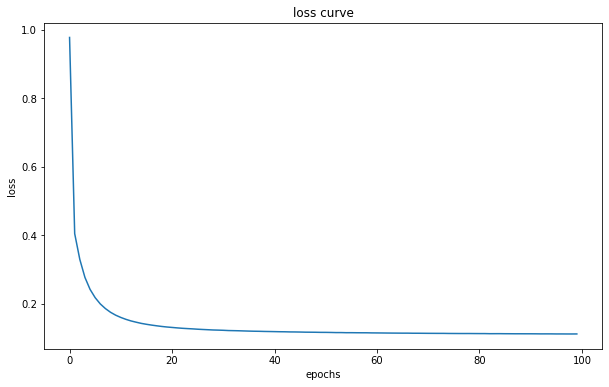

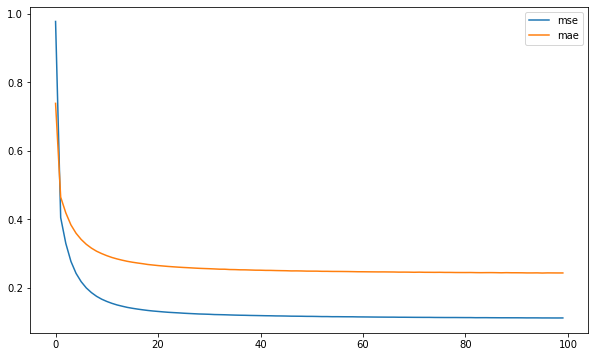

In [148]:
import matplotlib.pyplot as plt 

plt.title("loss curve")
plt.xlabel("epochs")
plt.ylabel("loss")
pd.DataFrame(history.history)["loss"].plot(figsize=(10,6)) 
pd.DataFrame(history.history)[["mse", "mae"]].plot(figsize=(10,6))
plt.show() 

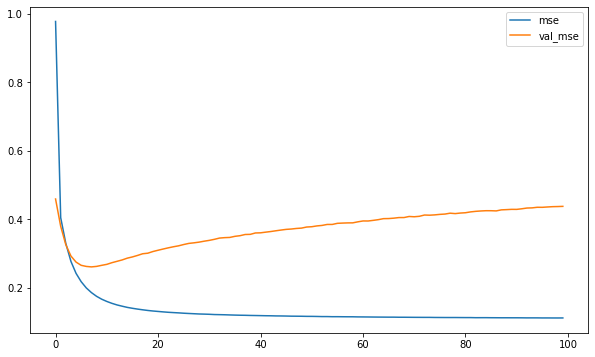

In [149]:
pd.DataFrame(history.history)[["mse", "val_mse"]].plot(figsize=(10,6))
plt.show() 

In [153]:
model.set_weights(initial_weights)

In [154]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",patience=3)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
history = model.fit(
    [X_train.LHS_C, X_train.RHS_C], 
    y_train,
    validation_data=([X_test.LHS_C, X_test.RHS_C], y_test),
    epochs=100, 
    callbacks=[early_stopping]
)

Epoch 1/100
6831/6831 [==============================] - 20s 3ms/step - loss: 0.9940 - mae: 0.7459 - mse: 0.9940 - val_loss: 0.4538 - val_mae: 0.4886 - val_mse: 0.4538
Epoch 2/100
6831/6831 [==============================] - 21s 3ms/step - loss: 0.3927 - mae: 0.4573 - mse: 0.3927 - val_loss: 0.3664 - val_mae: 0.4409 - val_mse: 0.3664
Epoch 3/100
6831/6831 [==============================] - 22s 3ms/step - loss: 0.3155 - mae: 0.4094 - mse: 0.3155 - val_loss: 0.3197 - val_mae: 0.4140 - val_mse: 0.3197
Epoch 4/100
6831/6831 [==============================] - 20s 3ms/step - loss: 0.2688 - mae: 0.3785 - mse: 0.2688 - val_loss: 0.2920 - val_mae: 0.3990 - val_mse: 0.2920
Epoch 5/100
6831/6831 [==============================] - 24s 3ms/step - loss: 0.2381 - mae: 0.3568 - mse: 0.2381 - val_loss: 0.2767 - val_mae: 0.3915 - val_mse: 0.2767
Epoch 6/100
6831/6831 [==============================] - 23s 3ms/step - loss: 0.2160 - mae: 0.3403 - mse: 0.2160 - val_loss: 0.2704 - val_mae: 0.3892 - val_mse:

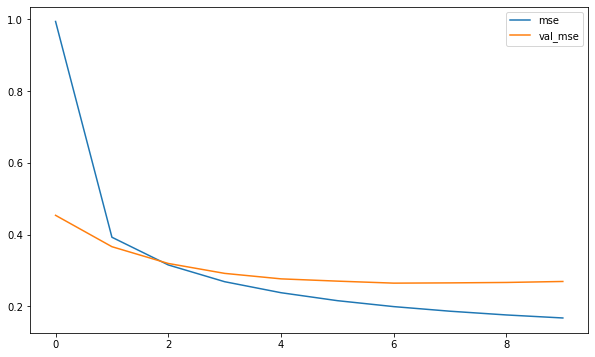

In [161]:
pd.DataFrame(history.history)[["mse", "val_mse"]].plot(figsize=(10,6))
plt.show() 

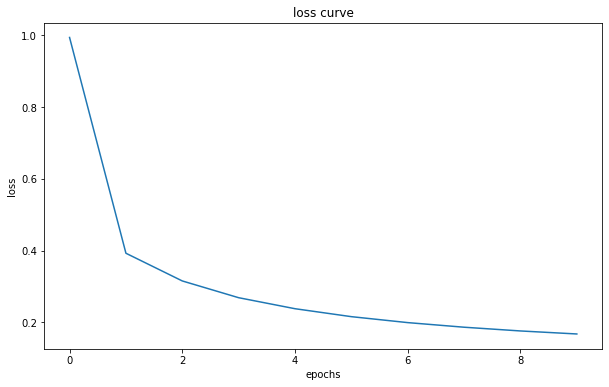

In [160]:
plt.title("loss curve")
plt.xlabel("epochs")
plt.ylabel("loss")
pd.DataFrame(history.history)["loss"].plot(figsize=(10,6)) 
plt.show() 

In [162]:
lhs_embddings = model.get_layer(name='lhs-embeddings').get_weights()[0]
lhs_embddings

array([[ 0.05444679, -0.15497532, -0.03975978, ..., -0.21779673,
        -0.04953405, -0.19831128],
       [-0.161224  , -0.12987842, -0.16163631, ...,  0.01651466,
        -0.02219854, -0.07976579],
       [-0.19332881, -0.26915818,  0.2052333 , ...,  0.2672566 ,
        -0.34760576, -0.24698003],
       ...,
       [-0.20373599,  0.03305611,  0.08360191, ..., -0.20985837,
         0.15588471,  0.17243434],
       [-0.49274397,  0.09540527,  0.38966033, ...,  0.6062298 ,
         0.25041145,  0.20531167],
       [ 0.03706029,  0.0066414 ,  0.04201052, ..., -0.00484476,
        -0.02308061,  0.03915468]], dtype=float32)

In [163]:
rhs_embddings = model.get_layer(name='rhs-embeddings').get_weights()[0]
rhs_embddings

array([[ 8.5571408e-03, -2.8197123e-02, -3.8261961e-02, ...,
        -3.5836436e-02, -1.4554966e-02,  4.9517576e-02],
       [-3.6809194e-01, -3.0140632e-01, -3.1525329e-01, ...,
        -1.5369308e-02, -1.2778670e-01, -1.0495425e-01],
       [-4.9172781e-02, -1.6342056e-01,  3.9757162e-02, ...,
        -1.9887355e-01,  5.0370052e-02, -2.0195502e-01],
       ...,
       [-2.2258058e-01,  2.6415446e-01,  1.5530334e-01, ...,
         5.1415974e-01,  4.5965257e-01,  3.2164985e-01],
       [-4.1087806e-01,  2.1958532e-02,  5.0764877e-01, ...,
         6.3703400e-01,  5.1544762e-01,  1.2466612e-01],
       [-3.5418153e-02,  4.3734163e-04,  4.7830831e-02, ...,
        -3.7035920e-02,  2.3733329e-02,  2.3336079e-02]], dtype=float32)

In [164]:
def recommend(option_in_category, number_of_options=5):
  options = lhs_embddings[option_in_category]@rhs_embddings.T
  mids = np.argpartition(options, -number_of_options)[-number_of_options:]
  
  return mids

In [165]:
sublist_by_2_concat.LHS.value_counts()[:20]

753600    1139
753376    1117
753350     826
525100     809
753536     799
751873     772
753509     744
753609     740
751600     733
778629     708
751754     707
759397     644
753517     639
751526     632
753572     613
716035     579
746304     545
753314     545
760352     544
748802     541
Name: LHS, dtype: int64

In [166]:
sublist_by_2_concat[sublist_by_2_concat.LHS == 759397].head()     # RHS = 721495, LHS = 751839

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C
1233,1.609438,"(759397, 753355)",2,759397,753355,3678,3238
1234,4.875197,"(759397, 753357)",2,759397,753357,3678,3240
1235,2.397895,"(759397, 755827)",2,759397,755827,3678,3576
1236,2.197225,"(759397, 753301)",2,759397,753301,3678,3206
1237,3.737670,"(759397, 702423)",2,759397,702423,3678,1398


In [169]:
id_list = recommend(
    3678,
    10
)

sublist_by_2_concat.query("RHS_C in @id_list").RHS.unique() 

array([753285, 751581, 753433, 753431, 753436, 759397, 753357, 753268,
       677927, 677910], dtype=int64)

In [94]:
id_list

array([1398, 4763, 4762, 4759, 4755], dtype=int64)

### Model.2 : With 3's Combine 

In [172]:
dataset_combined_MF.head() 

,rating,bill,option_count,LHS,RHS
0,0.693147,"(772494, 754574, 749358)",3,"(749358, 754574)",772494
1,0.693147,"(772494, 754574, 749358)",3,"(749358, 772494)",754574
2,0.693147,"(772494, 754574, 749358)",3,"(754574, 772494)",749358
3,0.693147,"(754574, 745328, 745310)",3,"(745328, 745310)",754574
4,0.693147,"(754574, 745328, 745310)",3,"(745310, 754574)",745328


In [173]:
dataset_combined_MF["LHS_C"] = dataset_combined_MF.LHS.astype('category').cat.codes.values
dataset_combined_MF["RHS_C"] = dataset_combined_MF.RHS.astype('category').cat.codes.values

dataset_combined_MF.head() 

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C
0,0.693147,"(772494, 754574, 749358)",3,"(749358, 754574)",772494,0,4448
1,0.693147,"(772494, 754574, 749358)",3,"(749358, 772494)",754574,1,3604
2,0.693147,"(772494, 754574, 749358)",3,"(754574, 772494)",749358,2,2898
3,0.693147,"(754574, 745328, 745310)",3,"(745328, 745310)",754574,3,3604
4,0.693147,"(754574, 745328, 745310)",3,"(745310, 754574)",745328,4,2634


In [178]:
len(dataset_combined_MF["RHS_C"].unique()), len(dataset_combined_MF["LHS_C"].unique())

(5192, 130493)

In [204]:
n_rhs, n_lhs = len(dataset_combined_MF.RHS_C.unique()), len(dataset_combined_MF.LHS_C.unique())
n_latent_factors = 20
# input, embedding --> 
lhs_input = keras.layers.Input(shape=(1,), name="lhs-item") 
lhs_embedding = keras.layers.Embedding(n_lhs + 1, n_latent_factors, name="lhs-embeddings")(lhs_input) 
lhs_vec = keras.layers.Flatten(name="flatten-lhs")(lhs_embedding) 

rhs_input= keras.layers.Input(shape=(1,), name="rhs-item")
rhs_embedding = keras.layers.Embedding(n_rhs + 1, n_latent_factors, name="rhs-embeddings")(rhs_input) 
rhs_vec = keras.layers.Flatten(name="flatten-rhs")(rhs_embedding)

product = keras.layers.dot([lhs_vec, rhs_vec], axes=1, name="dot-product") 
model_2 = keras.Model([lhs_input, rhs_input], product) 

model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [205]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(dataset_combined_MF[["RHS_C", "LHS_C"]], dataset_combined_MF.rating, test_size=0.10) 
X_train_3[:5], y_train_3[:5]

(        RHS_C   LHS_C
 306876   3846   53947
 347525   3881    4512
 529197   2864   98723
 563692   5009  106555
 840674   3289  126600,
 306876    0.693147
 347525    1.098612
 529197    1.386294
 563692    0.693147
 840674    0.693147
 Name: rating, dtype: object)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",patience=3)
history = model_2.fit(
    [X_train_3.LHS_C, X_train_3.RHS_C], 
    np.array(y_train_3, dtype=float),
    validation_data=([X_test_3.LHS_C, X_test_3.RHS_C], np.array(y_test_3, dtype=float)),
    epochs=100, 
    callbacks=[early_stopping]
)

# Model 2: Apriori (apyori Module)

In [2]:
from apyori import apriori 

In [9]:
associations = apriori(
    transactions,
    min_length = 2,
    max_length=4,
    min_support = 0.0001,
    min_confidence = 0.0001,
    min_lift = 0.0001,
)

associations = list(associations)
len(associations)

8374

In [10]:
association = associations[100]
print(association)
print("support", association.support)
print(association.ordered_statistics)
print("right", association.ordered_statistics[0].items_add)
print("left", association.ordered_statistics[0].items_base)
print("confidence", association.ordered_statistics[0].confidence)
print("lift", association.ordered_statistics[0].lift)


RelationRecord(items=frozenset({635458}), support=0.0007728733714453959, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({635458}), confidence=0.0007728733714453959, lift=1.0)])
support 0.0007728733714453959
[OrderedStatistic(items_base=frozenset(), items_add=frozenset({635458}), confidence=0.0007728733714453959, lift=1.0)]
right frozenset({635458})
left frozenset()
confidence 0.0007728733714453959
lift 1.0


In [11]:
rules = [] 
for association in associations:
    if len(association.ordered_statistics) > 1: 
        rules.append(association)

In [12]:
len(rules)

5228

In [13]:
rules 

[RelationRecord(items=frozenset({525099, 525100}), support=0.0011010378585273694, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({525099, 525100}), confidence=0.0011010378585273694, lift=1.0), OrderedStatistic(items_base=frozenset({525099}), items_add=frozenset({525100}), confidence=0.24224021592442646, lift=11.800967554677243), OrderedStatistic(items_base=frozenset({525100}), items_add=frozenset({525099}), confidence=0.05363812938891378, lift=11.800967554677243)]),
 RelationRecord(items=frozenset({525099, 701998}), support=0.00010734352381186054, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({525099, 701998}), confidence=0.00010734352381186054, lift=1.0), OrderedStatistic(items_base=frozenset({525099}), items_add=frozenset({701998}), confidence=0.023616734143049933, lift=4.914089258293739), OrderedStatistic(items_base=frozenset({701998}), items_add=frozenset({525099}), confidence=0.022335673261008295, lift=4.91408925